In [ ]:
# Fake News Detection Project
# This project uses machine learning to detect whether a news article is real or fake.
# Datasets used: fake.csv and true.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from wordcloud import WordCloud
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
!pip install wordcloud


In [9]:
from wordcloud import WordCloud


In [2]:
import pandas as pd


In [3]:
fake = pd.read_csv("fake.csv")
true = pd.read_csv("true.csv")

# Preview
print("Fake News Sample:")
print(fake.head())

print("\nReal News Sample:")
print(true.head())


Fake News Sample:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

Real News Sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip

In [4]:
fake["label"] = 0  # Fake
true["label"] = 1  # Real

# Combine datasets
data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle

# Check label distribution
data["label"].value_counts()


label
0    23481
1    21417
Name: count, dtype: int64

In [6]:
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
sns.countplot(data["label"])
plt.title("Distribution of Real and Fake News")
plt.xticks([0, 1], ["Fake", "Real"])
plt.show()


In [9]:
import matplotlib.pyplot as plt


In [11]:
from wordcloud import WordCloud


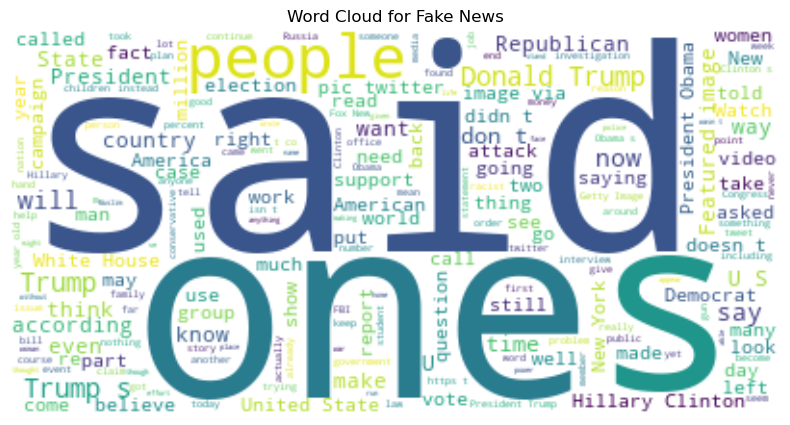

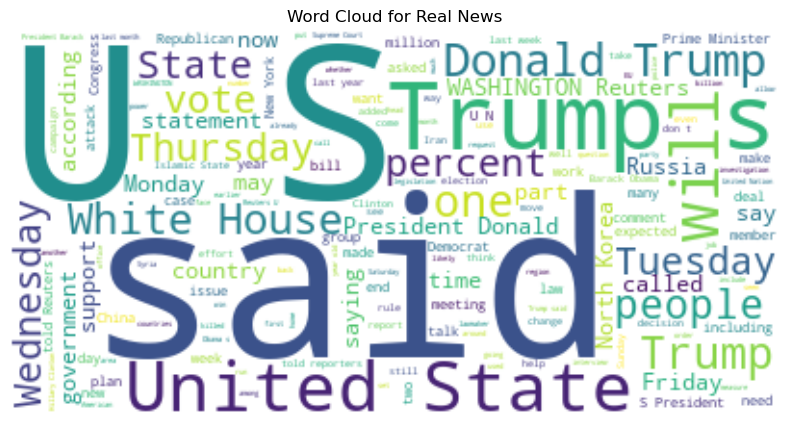

In [12]:
fake_text = " ".join(fake['text'].astype(str))
real_text = " ".join(true['text'].astype(str))

plt.figure(figsize=(10,5))
wc_fake = WordCloud(max_words=200, background_color="white").generate(fake_text)
plt.imshow(wc_fake, interpolation="bilinear")
plt.title("Word Cloud for Fake News")
plt.axis("off")
plt.show()

plt.figure(figsize=(10,5))
wc_real = WordCloud(max_words=200, background_color="white").generate(real_text)
plt.imshow(wc_real, interpolation="bilinear")
plt.title("Word Cloud for Real News")
plt.axis("off")
plt.show()


In [9]:
stop_words = stopwords.words("english")

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return " ".join([word for word in text.split() if word not in stop_words])

data['text'] = data['text'].astype(str).apply(clean_text)


In [6]:
# Install nltk if not already installed
# !pip install nltk  # Uncomment this line if needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from wordcloud import WordCloud
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Download stopwords
nltk.download('stopwords')

# Import stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from wordcloud import WordCloud
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# NLTK setup
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Load the datasets
fake = pd.read_csv("fake.csv")
true = pd.read_csv("true.csv")

# Add labels
fake["label"] = 0
true["label"] = 1

# Combine and shuffle
data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

# Check structure
data.head()


,title,text,subject,date,label
0,Russian MP says Flynn was forced to resign to ...,MOSCOW (Reuters) - A senior Russian lawmaker s...,politicsNews,"February 14, 2017",1
1,BREAKING: 20-YR OLD OBAMA VIDEO UNCOVERED: “I ...,Obama: I am saddened whites are still superio...,politics,"Oct 4, 2016",0
2,Britons can change terms of Brexit to diverge ...,LONDON (Reuters) - British voters will be able...,worldnews,"December 9, 2017",1
3,HILARIOUS: Seth Myers Exposes Trump’s Racist ...,Late Night host Seth Myers had a fun segment r...,News,"May 13, 2016",0
4,Democrats rising? Early statehouse wins test n...,(Reuters) - Democrats desperate to rebuild aft...,politicsNews,"October 12, 2017",1


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply cleaning to the 'text' column
data['text'] = data['text'].astype(str).apply(clean_text)


In [10]:
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [11]:
vectorizer = TfidfVectorizer(max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [12]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

Accuracy: 0.9869042316258352
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5882
           1       0.98      0.99      0.99      5343

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



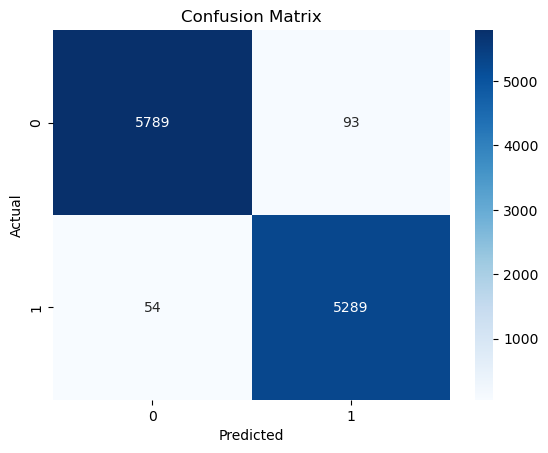

In [13]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
